<a href="https://colab.research.google.com/github/nareshgithub12/project1/blob/main/Hand_written_digit_reconition_project_for_ybi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train,10)
y_test = utils.to_categorical(y_test,10)

In [ ]:
y_trai edun.shedu trytry it

NameError: ignored

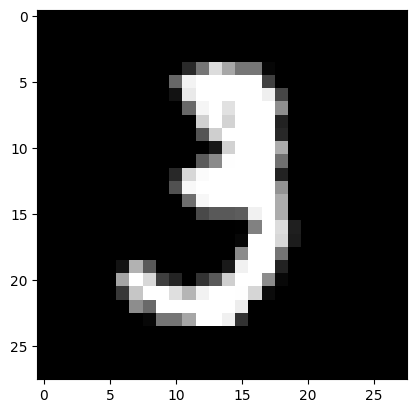

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10],cmap='gray')

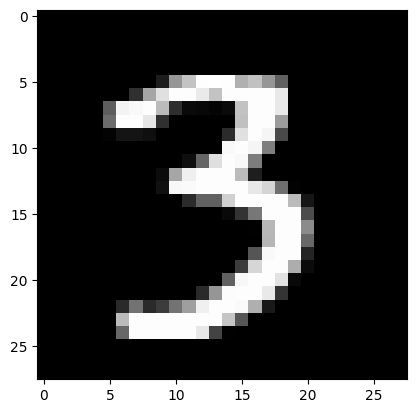

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10000],cmap='gray')

In [ ]:
arr1=y_train[100]
print(arr1)
arr2=y_train[10]
print(arr2)
arr3=y_train[10000]
print(arr3)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
import numpy as np
label1=np.argmax(arr1)
print(label1)
label2=np.argmax(arr2)
print(label2)
label3=np.argmax(arr3)

print(label3)

5
3
3


In [ ]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000, 10))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten

In [ ]:
model=Sequential()
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

model.add(Dense(512,activation="relu"))

model.add(Dense(10,activation="softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train,batch_size=128,epochs=100,verbose=1,validation_data=(x_test, y_test))

Epoch 1/100
469/469 [==============================] - 21s 12ms/step - loss: 0.4711 - accuracy: 0.8832 - val_loss: 0.0644 - val_accuracy: 0.9795
Epoch 2/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1445 - accuracy: 0.9582 - val_loss: 0.0487 - val_accuracy: 0.9856
Epoch 3/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1121 - accuracy: 0.9658 - val_loss: 0.0412 - val_accuracy: 0.9869
Epoch 4/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0927 - accuracy: 0.9733 - val_loss: 0.0420 - val_accuracy: 0.9862
Epoch 5/100
469/469 [==============================] - 5s 11ms/step - loss: 0.0825 - accuracy: 0.9762 - val_loss: 0.0375 - val_accuracy: 0.9874
Epoch 6/100
469/469 [==============================] - 5s 11ms/step - loss: 0.0701 - accuracy: 0.9785 - val_loss: 0.0417 - val_accuracy: 0.9872
Epoch 7/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0689 - accuracy: 0.9796 - val_loss: 0.0510 - val_accuracy

In [ ]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.0438 - accuracy: 0.9908


[0.043772462755441666, 0.9908000230789185]

In [ ]:
print(model.metrics_names)


['loss', 'accuracy']


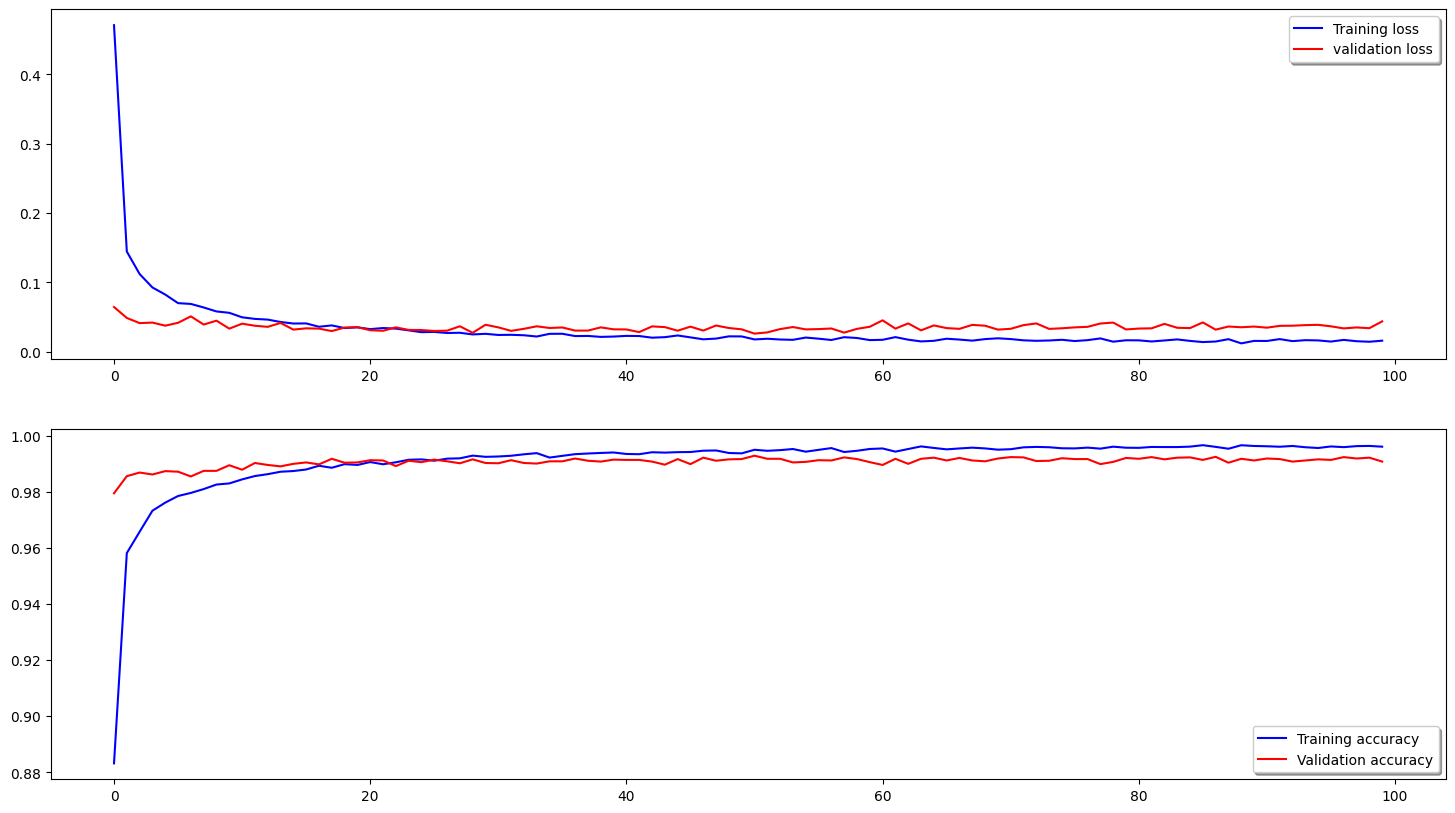

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='CNN_model_arch.png', show_shapes=True, show_layer_names=True)
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

313/313 [==============================] - 1s 2ms/step


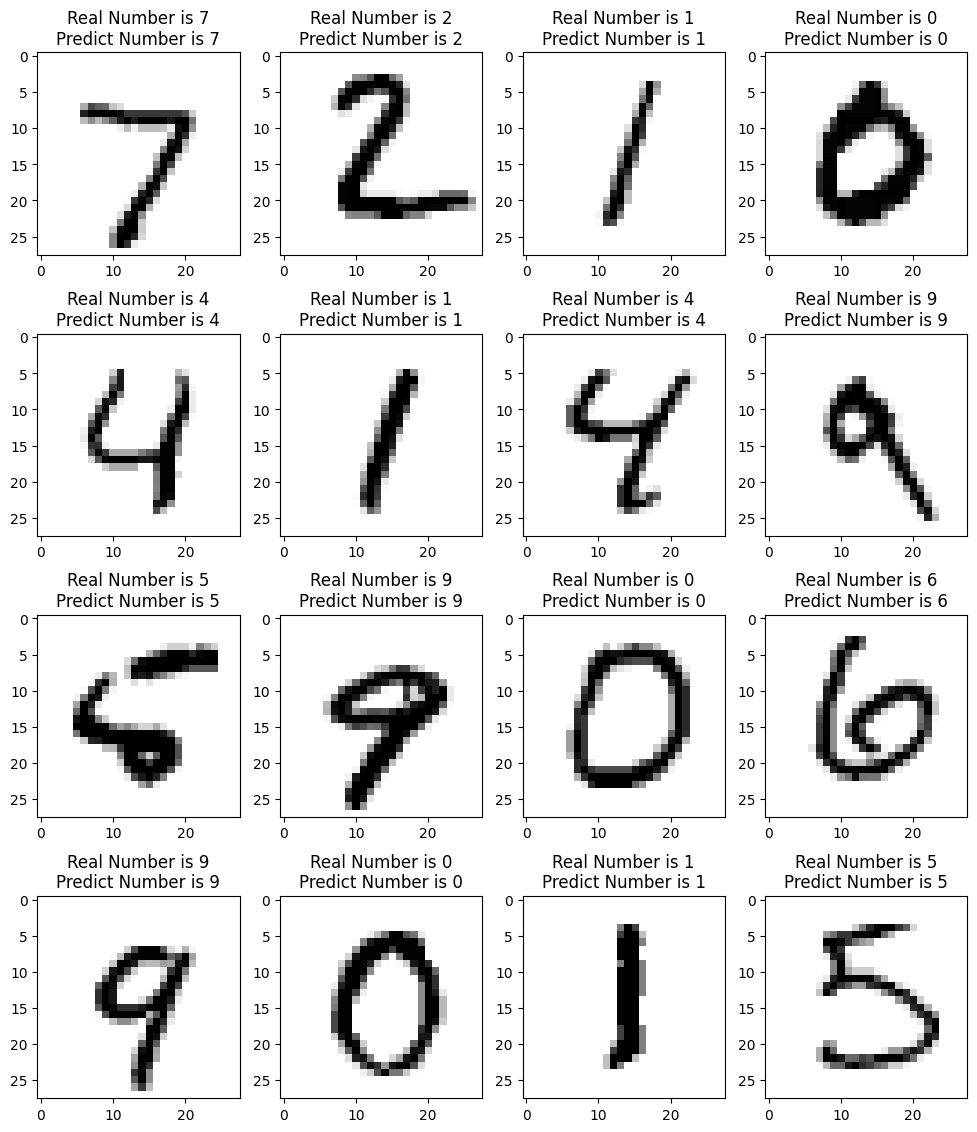

In [ ]:
y_pred = model.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy, loss))

313/313 [==============================] - 1s 3ms/step - loss: 0.0438 - accuracy: 0.9908
Validation: accuracy = 0.990800  ;  loss_v = 0.043772
